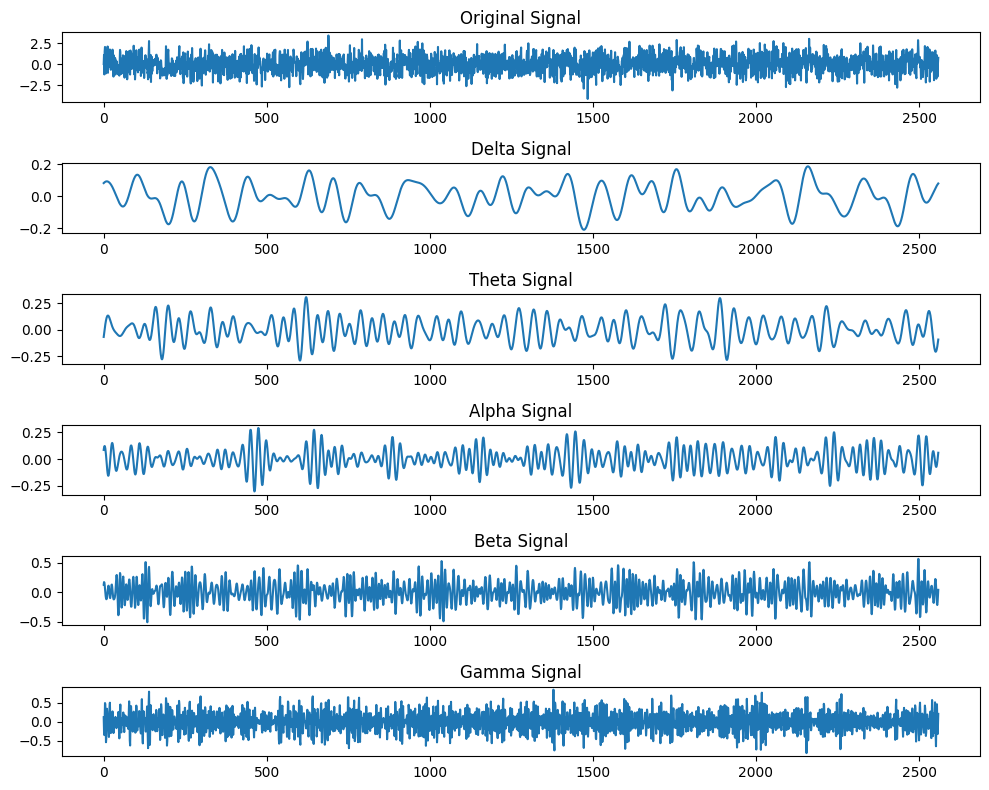

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency bands
DELTA = (0.5, 4)
THETA = (4, 8)
ALPHA = (8, 13)
BETA = (13, 30)
GAMMA = (30, 60)
BANDS = {'Delta': DELTA, 'Theta': THETA, 'Alpha': ALPHA, 'Beta': BETA, 'Gamma': GAMMA}

# Let's assume you have EEG data
HZ = 256.0  # Sample rate (Hz)
eeg_data = np.random.normal(size=int(HZ*10))  # 10s of data

# Perform FFT
fft_result = np.fft.fft(eeg_data)
fft_range = np.fft.fftfreq(len(eeg_data), 1 / HZ)

# Initialize dictionary for results
results = {}

for band, (low, high) in BANDS.items():
    # Create a copy of the original (complex) FFT results
    band_fft = fft_result.copy()

    # Zero out all frequencies that are not in this band
    band_fft[(fft_range < low) | (fft_range > high)] = 0

    # Inverse FFT to get back to time domain
    band_signal = np.fft.ifft(band_fft)

    # Store the result
    results[band] = band_signal.real  # .real is used to get rid of the small imaginary part due to numerical errors

# results now contains the time-domain signals for each band
X1 = results['Delta']
X2 = results['Theta']
X3 = results['Alpha']
X4 = results['Beta']
X5 = results['Gamma']

# Plot original signal
plt.figure(figsize=(10, 8))
plt.subplot(len(BANDS)+1, 1, 1)  # +1 is for the original signal
plt.plot(eeg_data)
plt.title('Original Signal')

# Plot decomposed signals
for i, (band, signal) in enumerate(results.items(), 2):  # Starts from 2 because we already plotted the original signal
    plt.subplot(len(BANDS)+1, 1, i)
    plt.plot(signal)
    plt.title(f'{band} Signal')

plt.tight_layout()
plt.show()
